# Metodología de la Simulación

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo Aproximación Número Pi

Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

Una aproximación analítica común del número pi es a través de series matemáticas. Una de las series más conocidas es la serie de Leibniz para pi, que es una serie alternante:
π=4(1− 1/3 + 1/5 - 1/7 + 1/9 - ...)

Otra serie comúnmente utilizada es la serie de Ramanujan para pi, que converge mucho más rápido.
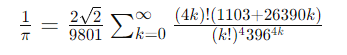

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

In [ ]:


1. Radio del círculo (r)

2. Longitud del lado del cuadrado (l): Este es el lado del cuadrado que circunscribe al círculo. l

3. Número total de puntos aleatorios generados (N)

4. Número de puntos dentro del círculo (Nc)

5. Número de puntos fuera del círculo (No)

Este es el "Método de Monte Carlo" para aproximar pi mediante simulación.

**PASO 2**. Formule la distribución de probabilidad de cada variable.

1. Radio del círculo (r): Se fija en 1
2. Longitud del lado del cuadrado (l): Tomandolo como una constante, como el diámetro del círculo (2r)
3. Número total de puntos aleatorios generados (N): Si se generan de manera uniforme en todo el cuadrado, entonces la distribución de probabilidad puede seguir una distribución uniforme discreta o continua, dependiendo de si se generan un número entero o real de puntos.
4. Número de puntos dentro del círculo (Nc): La distribución de probabilidad de Nc seguirá una distribución binomial, donde la probabilidad de éxito está determinada por la proporción del área del círculo al área del cuadrado.
5. Número de puntos fuera del círculo (No): La distribución de probabilidad de este parámetro también seguirá una distribución binomial.


**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

1. Radio del círculo (r):Es una constante.
2. Longitud del lado del cuadrado (l): Es una constante, como el diámetro del círculo (2r).
3. Número total de puntos aleatorios generados (N): La distribución acumulada seguirá una distribución discreta uniforme o continua uniforme, dependiendo de si se generan un número entero o real de puntos.
4. Número de puntos dentro del círculo (Nc): Seguirá una distribución binomial, que describe la probabilidad de obtener un cierto número de éxitos (puntos dentro del círculo) en un número fijo de ensayos (puntos totales generados).
5. Número de puntos fuera del círculo (No):Seguirá una distribución binomial.


**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

- Número total de puntos aleatorios generados (N): Cualquier número entero mayor que cero. (1-100000)
- Número de puntos dentro del círculo (Nc): Dado que el número de puntos dentro del círculo es una cantidad entera que varía de 0 a N (el número total de puntos generados), el intervalo de números aleatorios correspondiente será de 0 a N.
- Número de puntos fuera del círculo (No): De 0 a N.


**PASO 5**. Genere números aleatorios.

**PASO 6**. Simule un lanzamiento.

In [1]:
#Joel Ricardo Villagómez de Alba
import random

# Definimos el número total de puntos a generar
N = 100000

# Generamos puntos aleatorios dentro del cuadrado
puntos = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(N)]

# Contador para puntos dentro del círculo
Nc = 0

# Verificamos si cada punto está dentro del círculo
for punto in puntos:
    x, y = punto
    if x**2 + y**2 <= 1:
        Nc += 1

# Aproximación de pi
pi_aproximado = 4 * (Nc / N)

print("Aproximación de pi:", pi_aproximado)


Aproximación de pi: 3.14196


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

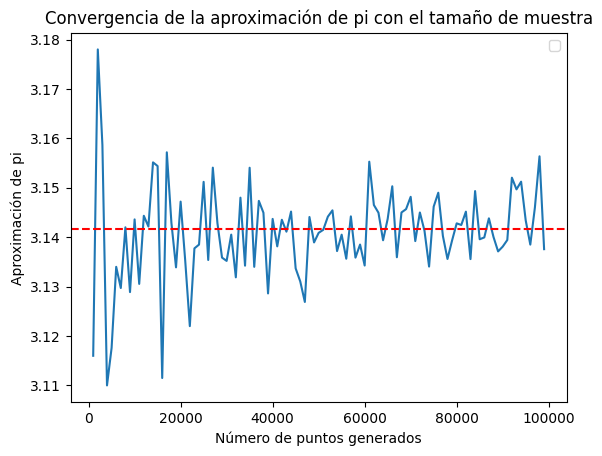

In [11]:
import random
import matplotlib.pyplot as plt

# Función para aproximar pi
def aproximar_pi(N):
    # Generamos puntos aleatorios dentro del cuadrado
    puntos = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(N)]

    # Contador para puntos dentro del círculo
    Nc = sum(1 for x, y in puntos if x**2 + y**2 <= 1)

    # Aproximación de pi
    pi_aproximado = 4 * (Nc / N)

    return pi_aproximado

# Lista para almacenar las aproximaciones de pi
pi_aproximado_lista = []

# Lista para almacenar el número de puntos generados
N_lista = []

# Rango de número de puntos a generar
rango_N = range(1000, 100000, 1000)

# Generar aproximaciones de pi para diferentes tamaños de muestra
for N in rango_N:
    pi_aproximado = aproximar_pi(N)
    pi_aproximado_lista.append(pi_aproximado)
    N_lista.append(N)

# Graficar aproximaciones de pi en función del número de puntos generados
plt.plot(N_lista, pi_aproximado_lista,  linestyle='-')
plt.axhline(y=3.141592653589793, color='r', linestyle='--')
plt.xlabel('Número de puntos generados')
plt.ylabel('Aproximación de pi')
plt.title('Convergencia de la aproximación de pi con el tamaño de muestra')
plt.legend()
plt.show()


**PASO 8**. Replique el modelo.

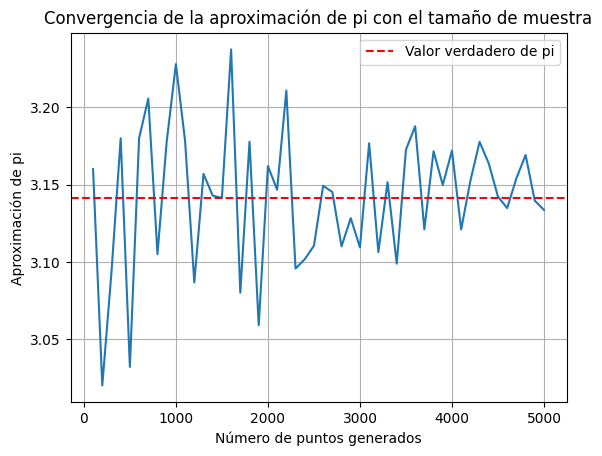

In [13]:
import random
import matplotlib.pyplot as plt

# Función para aproximar pi
def aproximar_pi(N):
    # Generamos puntos aleatorios dentro del cuadrado
    puntos = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(N)]

    # Contador para puntos dentro del círculo
    Nc = sum(1 for x, y in puntos if x**2 + y**2 <= 1)

    # Aproximación de pi
    pi_aproximado = 4 * (Nc / N)

    return pi_aproximado

# Lista para almacenar las aproximaciones de pi
pi_aproximado_lista = []

# Lista para almacenar el número de puntos generados
N_lista = []

# Rango de número de puntos a generar
rango_N = range(100, 5001, 100)

# Generar aproximaciones de pi para diferentes tamaños de muestra
for N in rango_N:
    pi_aproximado = aproximar_pi(N)
    pi_aproximado_lista.append(pi_aproximado)
    N_lista.append(N)

# Graficar aproximaciones de pi en función del número de puntos generados
plt.plot(N_lista, pi_aproximado_lista, linestyle='-')
plt.axhline(y=3.141592653589793, color='r', linestyle='--', label='Valor verdadero de pi')
plt.xlabel('Número de puntos generados')
plt.ylabel('Aproximación de pi')
plt.title('Convergencia de la aproximación de pi con el tamaño de muestra')
plt.legend()
plt.grid(True)
plt.show()
